In [11]:
# Open Modules
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.externals import joblib
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa

In [62]:
# Module made by myself
import training as tr

In [2]:
# Load Model
model = joblib.load("11112018_randomforest_oob.pkl")

In [3]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [4]:
# Load Data
f_format = "/2018111032450.wav"
directory = ""
#test_path = "/Users/junhyuckwoo/capstone/TestFile/Data/DistanceTest/mavic/*.wav"
test_path = "/Users/junhyuckwoo/capstone/TestFile/testing" + directory + f_format
test_files = glob.glob(test_path)
files_num = len(test_files)
print("# Test filest: ", files_num)

# Test filest:  1


In [22]:
result = []

In [23]:
# Input daata Preprocessing
raw, sr = librosa.load(test_files[0], sr=44100)
for i in range(0, len(raw), 44100):
    raw_ = raw[i:i+44100]
    norm = maxabs_scale(raw_[:40000])
    data= librosa.feature.mfcc(norm, sr=44100, n_mfcc=13).T
    prediction = model.predict(data)
    result.append(prediction)
    # Checking for debugging
print("Raw Shape", norm.shape)
print("Data Shape", data.shape)

Raw Shape (40000,)
Data Shape (79, 13)


In [12]:
 label = np.ones(len(data))*0

In [13]:
test = data
y = label

In [14]:
prediction = model.predict(test)

In [16]:
print(prediction)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


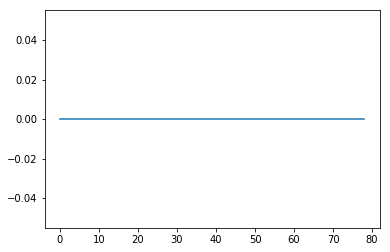

In [15]:
plt.plot(prediction)

In [156]:
result = tr.cross_val(model, test, y, 0.2, 10)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)
Input Data:  (30922, 13)
Label Data:  (30922,)
Ratio:  0.2
Iteration:  10 

0 is finished, Accuracy:  0.9578011317704123
1 is finished, Accuracy:  0.9544058205335489


/Users/junhyuckwoo/capstone/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


2 is finished, Accuracy:  0.9535974130962005
3 is finished, Accuracy:  0.9589329021827001
4 is finished, Accuracy:  0.9578011317704123
5 is finished, Accuracy:  0.9587712206952304
6 is finished, Accuracy:  0.9539207760711399
7 is finished, Accuracy:  0.9556992724333064
8 is finished, Accuracy:  0.9566693613581245
9 is finished, Accuracy:  0.9510105092966855

F-Score: 0.956
Accuracy:  0.955860953920776
             precision    recall  f1-score   support

        0.0       1.00      0.96      0.98      6185
        1.0       0.00      0.00      0.00         0
        2.0       0.00      0.00      0.00         0
        3.0       0.00      0.00      0.00         0

avg / total       1.00      0.96      0.98      6185

